In [11]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

# Load digits dataset
digits = datasets.load_digits()
labels = digits.target
images = digits.images

data = []

# Process images to extract contours and moments
for idx, image in enumerate(images):
    image_uint8 = np.uint8(image)
    ret, thresh = cv2.threshold(image_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    img_moment = []

    for cnt in contours:
        M = cv2.moments(cnt)
        img_moment.extend(list(M.values()))

    data.append(img_moment)

# Pad sequences to have the same length
max_length = max(len(item) for item in data)
data = [np.pad(seq, (0, max_length - len(seq)), 'constant') for seq in data]

# Convert data to DataFrame
df_data = pd.DataFrame(data)
df_data = df_data.astype('float32')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df_data, digits.target, test_size=0.2, shuffle=False
)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.1534 - loss: 124.3003 
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.4823 - loss: 7.9747
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.5527 - loss: 4.5208
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.5677 - loss: 3.7651
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.6089 - loss: 2.9604
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.6365 - loss: 2.3488
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.6221 - loss: 2.4571
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.6698 - loss: 2.5166
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.6526 - loss: 2.0175
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.6657 - loss: 2.3198
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.7307 - loss: 1.4067
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


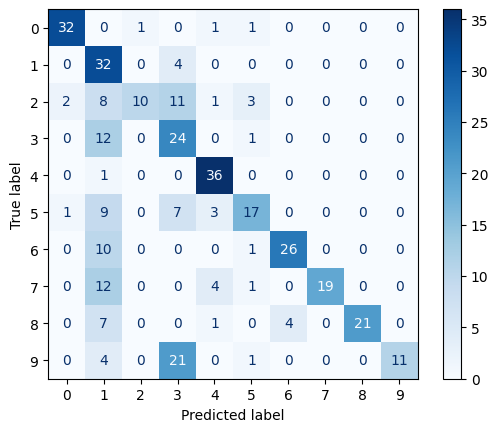

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [13]:
# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print('\nConfusion Matrix:\n', conf_matrix)
print('\nPrecision:', precision)
# print('\nRecall:', recall)
# print('\nF1-Score:', f1)
print("\nAccuracy: ", accuracy)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step

Confusion Matrix:
 [[32  0  1  0  1  1  0  0  0  0]
 [ 0 32  0  4  0  0  0  0  0  0]
 [ 2  8 10 11  1  3  0  0  0  0]
 [ 0 12  0 24  0  1  0  0  0  0]
 [ 0  1  0  0 36  0  0  0  0  0]
 [ 1  9  0  7  3 17  0  0  0  0]
 [ 0 10  0  0  0  1 26  0  0  0]
 [ 0 12  0  0  4  1  0 19  0  0]
 [ 0  7  0  0  1  0  4  0 21  0]
 [ 0  4  0 21  0  1  0  0  0 11]]

Precision: 0.781615048213156

Accuracy:  0.6333333333333333


In [14]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

digits = datasets.load_digits()
labels = digits.target
images = digits.images

data = []

for idx, image in enumerate(images):
    image_uint8 = np.uint8(image)
    ret, thresh = cv2.threshold(image_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    img_Rect = []

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        img_Rect.extend([x, y, w, h])
    data.append(img_Rect)


max_length = max(len(item) for item in data)
data = [np.pad(seq, (0, max_length - len(seq)), 'constant') for seq in data]


df_data = pd.DataFrame(data)
df_data = df_data.astype('float32')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_data, digits.target, test_size=0.2, shuffle=False
)

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)



Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.2089 - loss: 2.2311 
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.3820 - loss: 1.7402
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.4141 - loss: 1.6421
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.4358 - loss: 1.6063
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.4399 - loss: 1.5246
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.4874 - loss: 1.5280
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.4406 - loss: 1.5349
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.4919 - loss: 1.4558
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.4759 - loss: 1.4769
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.4993 - loss: 1.4569
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.4550 - loss: 1.4693
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


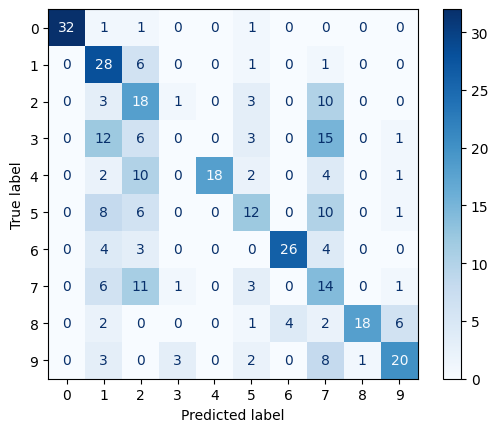

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [16]:
# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
accuracy = accuracy_score(y_test, y_pred)

print('\nConfusion Matrix:\n', conf_matrix)
print('\nPrecision:', precision)
print('\nRecall:', recall)
print('\nF1-Score:', f1)
print("\nAccuracy: ", accuracy)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step

Confusion Matrix:
 [[32  1  1  0  0  1  0  0  0  0]
 [ 0 28  6  0  0  1  0  1  0  0]
 [ 0  3 18  1  0  3  0 10  0  0]
 [ 0 12  6  0  0  3  0 15  0  1]
 [ 0  2 10  0 18  2  0  4  0  1]
 [ 0  8  6  0  0 12  0 10  0  1]
 [ 0  4  3  0  0  0 26  4  0  0]
 [ 0  6 11  1  0  3  0 14  0  1]
 [ 0  2  0  0  0  1  4  2 18  6]
 [ 0  3  0  3  0  2  0  8  1 20]]

Precision: 0.5783387869325787

Accuracy:  0.5166666666666667


In [17]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

digits = datasets.load_digits()
labels = digits.target
images = digits.images

data = []

moment_keys = [
    "m00", "m10", "m01", "m20", "m11", "m02", "m30", "m21", "m12", "m03",
    "mu20", "mu11", "mu02", "mu30", "mu21", "mu12", "mu03",
    "nu20", "nu11", "nu02", "nu30", "nu21", "nu12", "nu03"
]

for image in images:
    image_uint8 = np.uint8(image)
    ret, thresh = cv2.threshold(image_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img_moment = []
    for cnt in contours:
        M = cv2.moments(cnt)
        img_moment.extend([M[key] for key in moment_keys])
        x, y, w, h = cv2.boundingRect(cnt)
        img_moment.extend([x, y, w, h])


    data.append(img_moment)

max_length = max(len(item) for item in data)
data = [np.pad(seq, (0, max_length - len(seq)), 'constant') for seq in data]

df_data = pd.DataFrame(data)
df_data = df_data.astype('float32')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_data, digits.target, test_size=0.2, shuffle=False
)

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.1664 - loss: 78.4173  
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.5209 - loss: 5.8181
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.5548 - loss: 4.5998
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.6119 - loss: 2.9949
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.6281 - loss: 2.6319
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.5868 - loss: 3.1634
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.6460 - loss: 2.5981
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.6921 - loss: 1.9663
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.6593 - loss: 2.4518
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.7278 - loss: 1.6778
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.6807 - loss: 2.0031
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


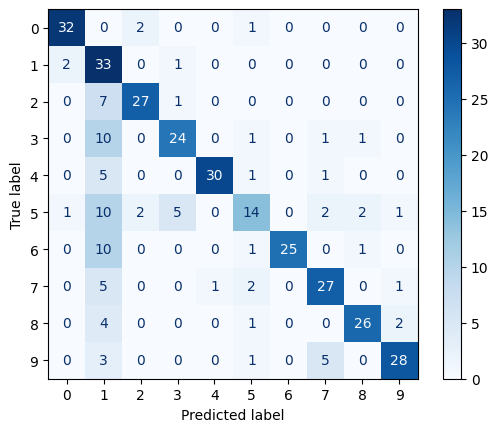

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [19]:
# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print('\nConfusion Matrix:\n', conf_matrix)
print('\nPrecision:', precision)
# print('\nRecall:', recall)
# print('\nF1-Score:', f1)
print("\nAccuracy: ", accuracy)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step

Confusion Matrix:
 [[32  0  2  0  0  1  0  0  0  0]
 [ 2 33  0  1  0  0  0  0  0  0]
 [ 0  7 27  1  0  0  0  0  0  0]
 [ 0 10  0 24  0  1  0  1  1  0]
 [ 0  5  0  0 30  1  0  1  0  0]
 [ 1 10  2  5  0 14  0  2  2  1]
 [ 0 10  0  0  0  1 25  0  1  0]
 [ 0  5  0  0  1  2  0 27  0  1]
 [ 0  4  0  0  0  1  0  0 26  2]
 [ 0  3  0  0  0  1  0  5  0 28]]

Precision: 0.8030864189728206

Accuracy:  0.7388888888888889
